In [2]:
import keras
import numpy as np
from keras.applications import vgg16, mobilenet, resnet50, densenet

In [4]:
vgg16_model = vgg16.VGG16()
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
mobile_model = mobilenet.MobileNet()
mobile_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [6]:
resnet50_model = resnet50.ResNet50()
resnet50_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [3]:
densenet_model = densenet.DenseNet121()
densenet_model.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 9d60b8095a5708f2dcce2bca79d332c7 so we will re-download the data.
33193984/33188688 [==============================] - 173s 5us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
____________________________________________

In [7]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [8]:
filename = "test_000277.jpg"

PIL image size (224, 224)


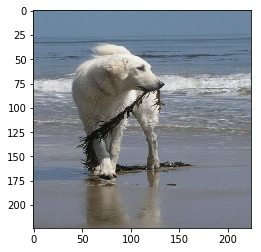

In [9]:
original = load_img(filename,target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

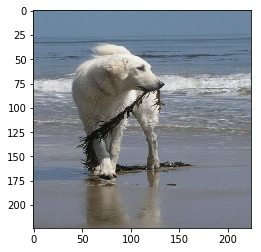

numpy array size (224, 224, 3)


In [10]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


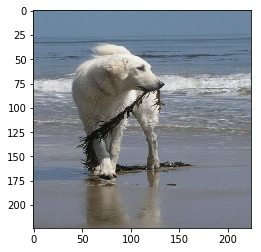

In [11]:
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [12]:
#vgg16 prediction
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions_vgg16 = vgg16_model.predict(processed_image)
label_vgg16 = decode_predictions(predictions_vgg16)
print(label_vgg16)

[[('n02111500', 'Great_Pyrenees', 0.7522908), ('n02104029', 'kuvasz', 0.11681631), ('n02111889', 'Samoyed', 0.04828849), ('n02110063', 'malamute', 0.016972966), ('n02105641', 'Old_English_sheepdog', 0.010940819)]]


In [13]:
#mobile prediction
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions_mobile = mobile_model.predict(processed_image)
label_mobile = decode_predictions(predictions_mobile)
print(label_mobile)

[[('n02104029', 'kuvasz', 0.60284114), ('n02090622', 'borzoi', 0.20911463), ('n02111500', 'Great_Pyrenees', 0.067058146), ('n02114548', 'white_wolf', 0.036064997), ('n02111889', 'Samoyed', 0.019519202)]]


In [14]:
#resnet50 prediction
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions_resnet50 = resnet50_model.predict(processed_image)
label_resnet50 = decode_predictions(predictions_resnet50)
print(label_resnet50)

[[('n02104029', 'kuvasz', 0.89480376), ('n02111500', 'Great_Pyrenees', 0.06975052), ('n02111889', 'Samoyed', 0.020449217), ('n02134084', 'ice_bear', 0.005795503), ('n02114548', 'white_wolf', 0.0020209444)]]


In [15]:
#densenet prediction
processed_image = densenet.preprocess_input(image_batch.copy())
predictions_densenet = densenet_model.predict(processed_image)
label_densenet = decode_predictions(predictions_densenet)
print(label_resnet50)

[[('n02104029', 'kuvasz', 0.89480376), ('n02111500', 'Great_Pyrenees', 0.06975052), ('n02111889', 'Samoyed', 0.020449217), ('n02134084', 'ice_bear', 0.005795503), ('n02114548', 'white_wolf', 0.0020209444)]]


# No Top Model

In [ ]:
mobile_model = mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [41]:
mobile_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, 70, 70, 3)    0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [42]:
from keras import models, Sequential, layers

In [45]:
model = models.Sequential()

In [44]:
for layer in densenet_model.layers:
    layer.trainable=False
    model.add(layer)

    

ValueError: A merge layer should be called on a list of inputs.